In [43]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Your code here


In [44]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframe
df.head()


age  sex  cough  fever  chills  sore_throat  headache  fatigue  Urgency
0  30.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0        0
1  47.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0        0
2  49.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0        0
3  50.0  0.0    0.0    0.0     0.0          0.0       0.0      0.0        0
4  59.0  0.0    0.0    1.0     0.0          0.0       0.0      0.0        0

In [45]:
# Check if there are any missing or Null values
df.isnull().any(axis=1).sum()




37

In [46]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = 37
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [47]:
# kNN impute the missing data
# Use a k value of 5
X = df.iloc[:,0:8]
y = df.iloc[:,8]
imputer = KNNImputer(n_neighbors=5)

# Your code here


In [48]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe
X_imputed_df = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
df = pd.concat([X_imputed_df, y], axis=1)
# Your code here



    

## EDA

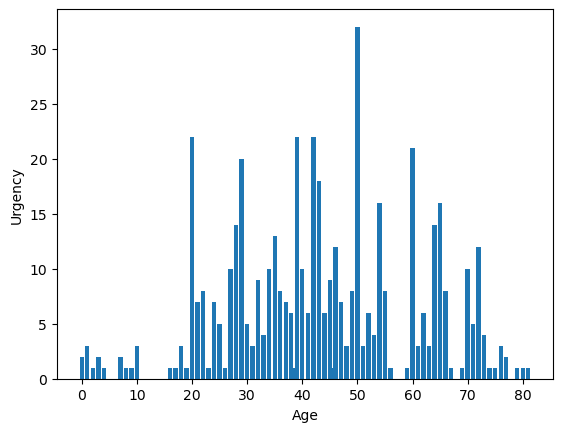

In [49]:
# Plot an appropriate graph to answer the following question
# Your code here
urgency_counts = df[df['Urgency'] == 1].groupby('age').size()
fig, ax = plt.subplots()
ax.bar(urgency_counts.index, urgency_counts.values)

# Adding labels and title for clarity
plt.xlabel('Age')
plt.ylabel('Urgency')


# Show the plot
plt.show()


urgent_cases = df[df['Urgency'] == 1]
non_urgent_cases = df[df['Urgency'] == 0]

# Plotting
plt.hist([urgent_cases['age'], non_urgent_cases['age']], bins=8, alpha=0.5, label=['Urgent', 'Not Urgent'])
plt.xlabel('age')
plt.ylabel('Number of Patients')
plt.show()


### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [50]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


In [51]:
# Plot an appropriate graph to answer the following question    
# Your code here
urgent_cases = df[df['Urgency'] == 1]

# Plotting
symptoms_counts = [urgent_cases['cough'].sum(), urgent_cases['fever'].sum(),urgent_cases['sore_throat'].sum(), urgent_cases['fatigue'].sum()]
symptoms = ["Cough", "Fever","Sore Throat", "Fatigue"]

# Creating a bar chart
plt.bar(symptoms, symptoms_counts, alpha=0.7, color=['blue', 'red', 'green'])
plt.ylabel('Number of Patients')
plt.show()



### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [52]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


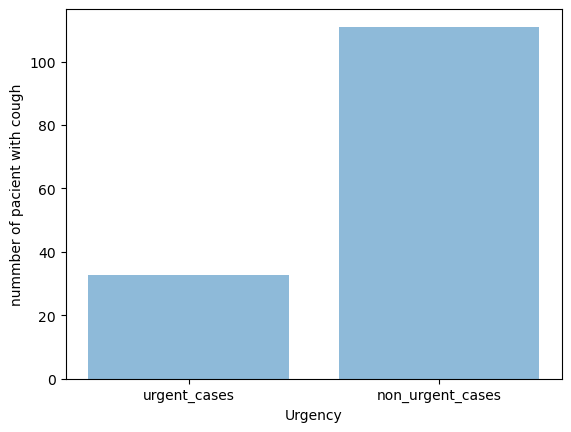

In [53]:
# Plot an appropriate graph to answer the following question    
# Your code here


cought_counts = [urgent_cases["cough"].sum(), non_urgent_cases["cough"].sum()]
urgencz = ["urgent_cases","non_urgent_cases"]
plt.bar(urgencz,cought_counts,alpha=0.5)

plt.xlabel("Urgency")
plt.ylabel("nummber of pacient with cough")
plt.show()




### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [54]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [55]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split

# Your code here
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)

In [56]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df.to_csv("df_train", index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indice
df.to_csv("df_test", index=False)
